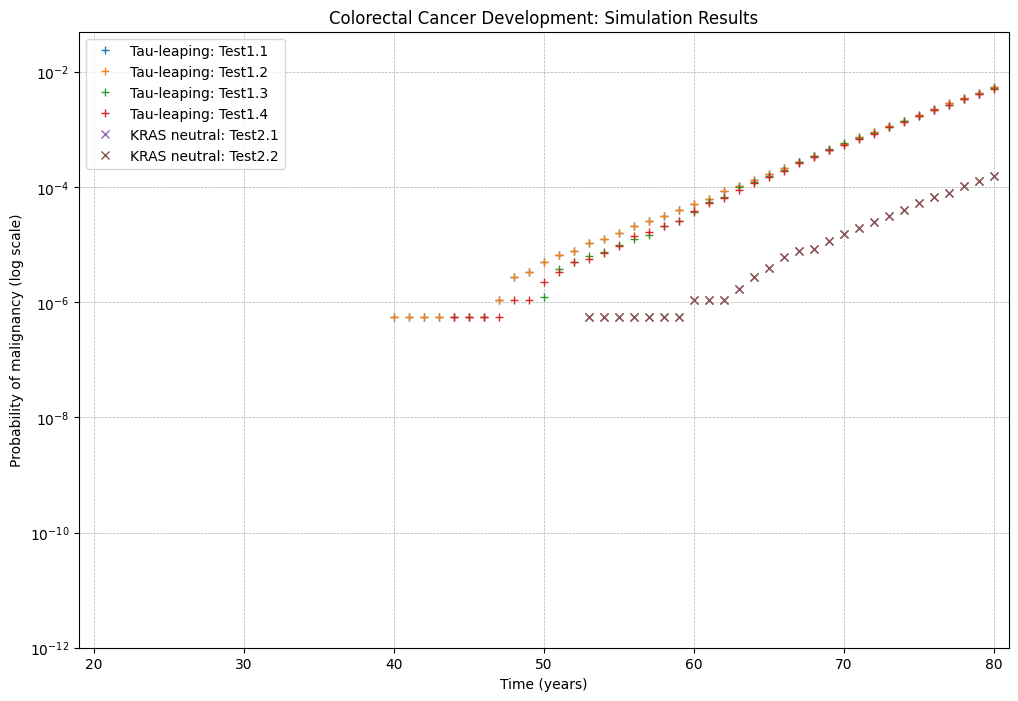

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(threshold=np.inf)

# Function to read and process CSV files
def process_csv(file_name):
    """Read and process a CSV file to calculate cancer probabilities."""
    df = pd.read_csv(file_name, header=None)
    years = df[0]
    state_331 = df[38]  # (3,3,1) state
    state_341 = df[40]  # (3,4,1) state
    state_431 = df[48]  # (4,3,1) state
    state_441 = df[50]  # (4,4,1) state
    cancer_prob = state_331 + state_341 + state_431 + state_441
    return years, cancer_prob

# Main execution
if __name__ == "__main__":
    # Read and process CSV files for Tau-leaping simulations
    tau_files = ['test1.1.csv', 'test1.2.csv', 'test1.3.csv', 'test1.4.csv']
    tau_years = []
    tau_probs = []
    for file in tau_files:
        years, prob = process_csv(file)
        tau_years.append(years)
        tau_probs.append(prob)
    
    # Read and process CSV files for KRAS neutral simulations
    kras_files = ['test2.1.csv', 'test2.2.csv']
    kras_years = []
    kras_probs = []
    for file in kras_files:
        years, prob = process_csv(file)
        kras_years.append(years)
        kras_probs.append(prob)
    
    # Plot simulation results
    plt.figure(figsize=(12, 8))
    
    # Tau-leaping simulations
    for i in range(len(tau_files)):
        plt.semilogy(tau_years[i], tau_probs[i], '+', label=f'Tau-leaping: Test1.{i+1}')
    
    # KRAS neutral simulations
    for i in range(len(kras_files)):
        plt.semilogy(kras_years[i], kras_probs[i], 'x', label=f'KRAS neutral: Test2.{i+1}')
    
    # Customize plot
    plt.xlim(19, 81)
    plt.ylim(1e-12, 0.05)
    plt.xlabel('Time (years)')
    plt.ylabel('Probability of malignancy (log scale)')
    plt.title('Colorectal Cancer Development: Simulation Results')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()



Tau-leaping Average: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.77778000e-07 2.77778000e-07 2.77778000e-07 2.77778000e-07
 4.16667000e-07 4.16667000e-07 4.16667000e-07 6.94444000e-07
 1.66666750e-06 1.94444250e-06 3.36805500e-06 5.10416750e-06
 6.38889000e-06 8.22919000e-06 1.00694550e-05 1.29166615e-05
 1.71527775e-05 2.09722165e-05 2.61458165e-05 3.30902715e-05
 4.45138865e-05 5.90624990e-05 7.50347325e-05 1.00277839e-04
 1.

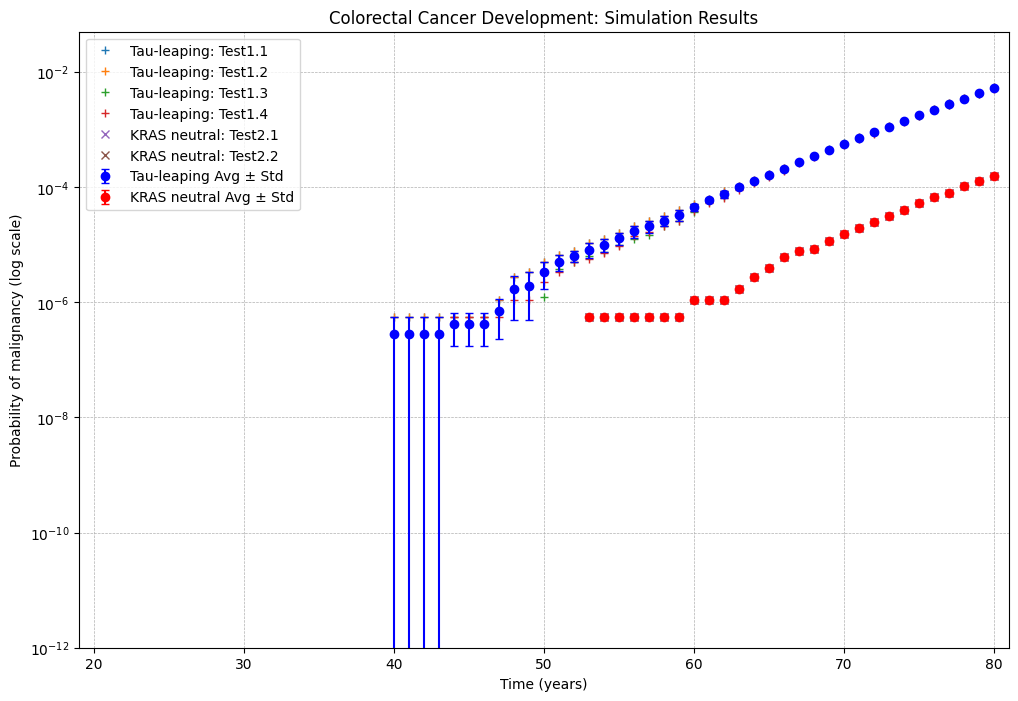

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(threshold=np.inf)

# Function to read and process CSV files
def process_csv(file_name):
    """Read and process a CSV file to calculate cancer probabilities."""
    df = pd.read_csv(file_name, header=None)
    years = df[0]
    state_331 = df[38]  # (3,3,1) state
    state_341 = df[40]  # (3,4,1) state
    state_431 = df[48]  # (4,3,1) state
    state_441 = df[50]  # (4,4,1) state
    cancer_prob = state_331 + state_341 + state_431 + state_441
    return years, cancer_prob

# Function to compute average and standard deviation
def compute_avg_std(probabilities):
    """Compute average and standard deviation across multiple simulations."""
    probabilities = np.array(probabilities)
    avg = np.mean(probabilities, axis=0)
    std = np.std(probabilities, axis=0)
    return avg, std

# Main execution
if __name__ == "__main__":
    # Read and process CSV files for Tau-leaping simulations
    tau_files = ['test1.1.csv', 'test1.2.csv', 'test1.3.csv', 'test1.4.csv']
    tau_years = []
    tau_probs = []
    for file in tau_files:
        years, prob = process_csv(file)
        tau_years.append(years)
        tau_probs.append(prob)
    
    # Read and process CSV files for KRAS neutral simulations
    kras_files = ['test2.1.csv', 'test2.2.csv']
    kras_years = []
    kras_probs = []
    for file in kras_files:
        years, prob = process_csv(file)
        kras_years.append(years)
        kras_probs.append(prob)
    
    # Compute average and standard deviation for Tau-leaping
    tau_avg, tau_std = compute_avg_std(tau_probs)
    years = tau_years[0]  # Assume all years arrays are the same
    
    # Compute average and standard deviation for KRAS neutral
    kras_avg, kras_std = compute_avg_std(kras_probs)
    
    # Print computed averages and standard deviations
    print("Tau-leaping Average:", tau_avg)
    print("Tau-leaping Std Dev:", tau_std)
    print("KRAS Neutral Average:", kras_avg)
    print("KRAS Neutral Std Dev:", kras_std)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    
    # Tau-leaping simulations
    for i in range(len(tau_files)):
        plt.semilogy(tau_years[i], tau_probs[i], '+', label=f'Tau-leaping: Test1.{i+1}')
    plt.errorbar(years, tau_avg, yerr=tau_std, fmt='o', label='Tau-leaping Avg ± Std', color='blue', capsize=3)

    # KRAS neutral simulations
    for i in range(len(kras_files)):
        plt.semilogy(kras_years[i], kras_probs[i], 'x', label=f'KRAS neutral: Test2.{i+1}')
    plt.errorbar(years, kras_avg, yerr=kras_std, fmt='o', label='KRAS neutral Avg ± Std', color='red', capsize=3)
    
    # Customize plot
    plt.xlim(19, 81)
    plt.ylim(1e-12, 0.05)
    plt.xlabel('Time (years)')
    plt.ylabel('Probability of malignancy (log scale)')
    plt.title('Colorectal Cancer Development: Simulation Results')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    
    # Save and display plot
    plt.savefig("simulation_results_with_avg_std.pdf", format="pdf", bbox_inches="tight")
    plt.show()


Tau-leaping Average: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.77778000e-07 2.77778000e-07 2.77778000e-07 2.77778000e-07
 4.16667000e-07 4.16667000e-07 4.16667000e-07 6.94444000e-07
 1.66666750e-06 1.94444250e-06 3.36805500e-06 5.10416750e-06
 6.38889000e-06 8.22919000e-06 1.00694550e-05 1.29166615e-05
 1.71527775e-05 2.09722165e-05 2.61458165e-05 3.30902715e-05
 4.45138865e-05 5.90624990e-05 7.50347325e-05 1.00277839e-04
 1.

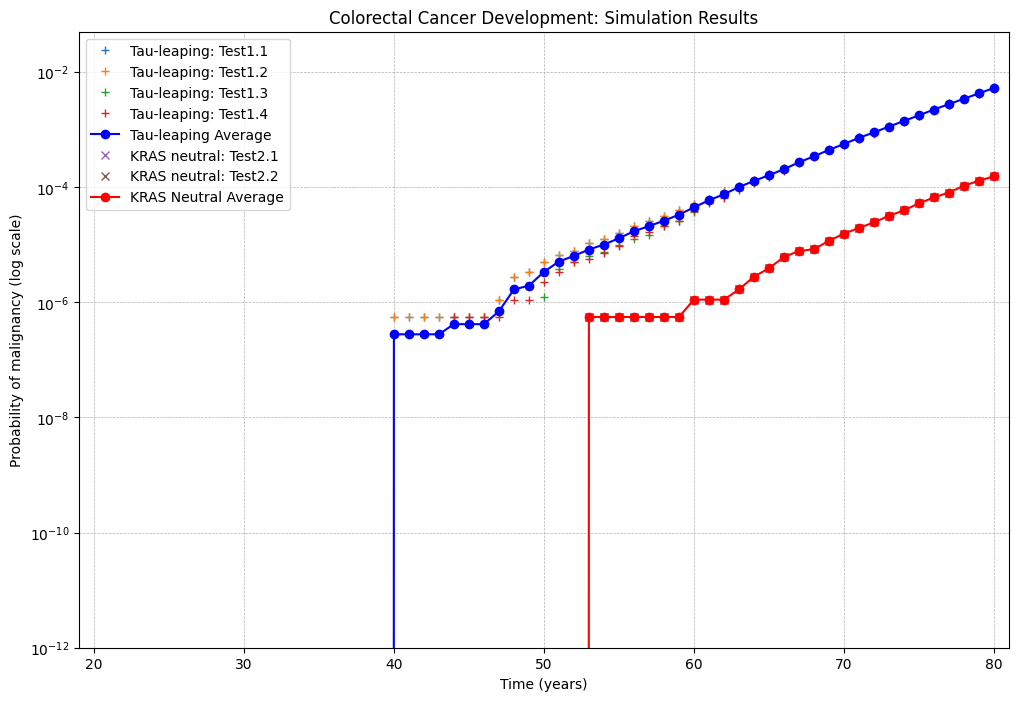

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(threshold=np.inf)

# Function to read and process CSV files
def process_csv(file_name):
    """Read and process a CSV file to calculate cancer probabilities."""
    df = pd.read_csv(file_name, header=None)
    years = df[0]
    state_331 = df[38]  # (3,3,1) state
    state_341 = df[40]  # (3,4,1) state
    state_431 = df[48]  # (4,3,1) state
    state_441 = df[50]  # (4,4,1) state
    cancer_prob = state_331 + state_341 + state_431 + state_441
    return years, cancer_prob

# Function to compute average
def compute_avg(probabilities):
    """Compute average across multiple simulations."""
    probabilities = np.array(probabilities)
    avg = np.mean(probabilities, axis=0)
    return avg

# Main execution
if __name__ == "__main__":
    # Read and process CSV files for Tau-leaping simulations
    tau_files = ['test1.1.csv', 'test1.2.csv', 'test1.3.csv', 'test1.4.csv']
    tau_years = []
    tau_probs = []
    for file in tau_files:
        years, prob = process_csv(file)
        tau_years.append(years)
        tau_probs.append(prob)
    
    # Read and process CSV files for KRAS neutral simulations
    kras_files = ['test2.1.csv', 'test2.2.csv']
    kras_years = []
    kras_probs = []
    for file in kras_files:
        years, prob = process_csv(file)
        kras_years.append(years)
        kras_probs.append(prob)
    
    # Compute average for Tau-leaping
    tau_avg = compute_avg(tau_probs)
    years = tau_years[0]  # Assume all years arrays are the same
    
    # Compute average for KRAS neutral
    kras_avg = compute_avg(kras_probs)
    
    # Print computed averages
    print("Tau-leaping Average:", tau_avg)
    print("KRAS Neutral Average:", kras_avg)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    
    # Tau-leaping simulations
    for i in range(len(tau_files)):
        plt.semilogy(tau_years[i], tau_probs[i], '+', label=f'Tau-leaping: Test1.{i+1}')
    plt.semilogy(years, tau_avg, 'o-', label='Tau-leaping Average', color='blue')

    # KRAS neutral simulations
    for i in range(len(kras_files)):
        plt.semilogy(kras_years[i], kras_probs[i], 'x', label=f'KRAS neutral: Test2.{i+1}')
    plt.semilogy(years, kras_avg, 'o-', label='KRAS Neutral Average', color='red')
    
    # Customize plot
    plt.xlim(19, 81)
    plt.ylim(1e-12, 0.05)
    plt.xlabel('Time (years)')
    plt.ylabel('Probability of malignancy (log scale)')
    plt.title('Colorectal Cancer Development: Simulation Results')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    
    # Save and display plot
    plt.savefig("simulation_results_with_avg.pdf", format="pdf", bbox_inches="tight")
    plt.show()
